<a href="https://colab.research.google.com/github/felstuff/BackToBasic/blob/master/Boosting%26Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
applesinthefridge = 1 # assignment n declaration is the same
b = 2 # assignment (used in Javascript)
c = 2*applesinthefridge # declaration (used in C++)
print(applesinthefridge)


1


In [39]:
d = c
print(a)

2


In [40]:
import pandas as pd
dataset = pd.read_csv("cancer.csv")
#"dataset" is jst the label of the data we're using, but once that's set, it that same name has to be applied
#throughout the script 

x = dataset.iloc[:, 2:29].values 
y = dataset.iloc[:, 1].values 


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#print(x_test)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1) #n = number of 
x_train_scaled = pca.fit_transform(x_train)
# print(x_train_scaled)
#PCA - can help to extract important data; and streamline the data onto one scaler 

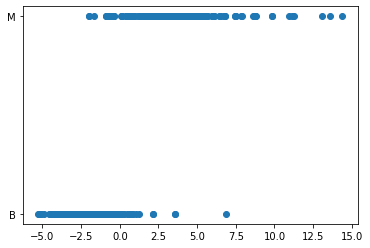

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier #can be used for regression as well
gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
y_preds = gradientboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  0]
 [ 5 37]]


In [47]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
y_preds = xgboost.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  0]
 [ 4 38]]


scaling does not always helps in tree 